## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.153531  0.980816 -0.023130  0.314719  0.539098  0.821113
1 -1.049282  0.106670  1.489767 -0.482391  0.008097 -0.201485
2 -0.719780  0.141053  1.338965 -0.038442  0.475975  0.389107
3  0.432542 -0.579573 -1.511824 -1.084456 -1.524840 -0.484274
4  0.215255  0.794009  0.131099 -0.864026  0.921861  0.232467


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0357961	total: 60.2ms	remaining: 1m
1:	learn: 1.0267259	total: 60.8ms	remaining: 30.3s
2:	learn: 1.0160679	total: 61.3ms	remaining: 20.4s
3:	learn: 1.0067758	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9969161	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9865533	total: 62.9ms	remaining: 10.4s
6:	learn: 0.9753556	total: 63.4ms	remaining: 9s
7:	learn: 0.9679165	total: 63.9ms	remaining: 7.93s
8:	learn: 0.9592448	total: 64.4ms	remaining: 7.09s
9:	learn: 0.9497745	total: 65ms	remaining: 6.43s
10:	learn: 0.9418944	total: 65.7ms	remaining: 5.9s
11:	learn: 0.9311644	total: 66.2ms	remaining: 5.45s
12:	learn: 0.9217792	total: 66.6ms	remaining: 5.05s
13:	learn: 0.9120319	total: 67.1ms	remaining: 4.72s
14:	learn: 0.9050677	total: 67.6ms	remaining: 4.44s
15:	learn: 0.8966448	total: 67.9ms	remaining: 4.17s
16:	learn: 0.8881694	total: 68.4ms	remaining: 3.95s
17:	learn: 0.8797002	total: 68.8ms	remaining: 3.75s
18:	learn: 0.8727078	total: 69.2ms	remaining: 3.57s
1

86:	learn: 0.4842786	total: 110ms	remaining: 1.16s
87:	learn: 0.4799755	total: 114ms	remaining: 1.18s
88:	learn: 0.4767056	total: 116ms	remaining: 1.18s
89:	learn: 0.4727540	total: 117ms	remaining: 1.18s
90:	learn: 0.4687133	total: 117ms	remaining: 1.17s
91:	learn: 0.4644177	total: 118ms	remaining: 1.16s
92:	learn: 0.4605381	total: 119ms	remaining: 1.16s
93:	learn: 0.4567716	total: 119ms	remaining: 1.15s
94:	learn: 0.4524619	total: 120ms	remaining: 1.14s
95:	learn: 0.4493849	total: 120ms	remaining: 1.13s
96:	learn: 0.4459137	total: 120ms	remaining: 1.12s
97:	learn: 0.4429738	total: 121ms	remaining: 1.11s
98:	learn: 0.4393941	total: 121ms	remaining: 1.1s
99:	learn: 0.4359742	total: 122ms	remaining: 1.09s
100:	learn: 0.4322510	total: 122ms	remaining: 1.08s
101:	learn: 0.4283102	total: 122ms	remaining: 1.08s
102:	learn: 0.4254058	total: 123ms	remaining: 1.07s
103:	learn: 0.4223635	total: 123ms	remaining: 1.06s
104:	learn: 0.4192951	total: 124ms	remaining: 1.05s
105:	learn: 0.4155849	total

236:	learn: 0.1738965	total: 191ms	remaining: 615ms
237:	learn: 0.1729973	total: 192ms	remaining: 613ms
238:	learn: 0.1719167	total: 192ms	remaining: 611ms
239:	learn: 0.1706967	total: 192ms	remaining: 609ms
240:	learn: 0.1697174	total: 193ms	remaining: 607ms
241:	learn: 0.1685810	total: 193ms	remaining: 605ms
242:	learn: 0.1673980	total: 194ms	remaining: 603ms
243:	learn: 0.1662114	total: 194ms	remaining: 601ms
244:	learn: 0.1651981	total: 195ms	remaining: 600ms
245:	learn: 0.1641695	total: 195ms	remaining: 598ms
246:	learn: 0.1631027	total: 196ms	remaining: 597ms
247:	learn: 0.1617710	total: 197ms	remaining: 596ms
248:	learn: 0.1606339	total: 197ms	remaining: 594ms
249:	learn: 0.1597354	total: 197ms	remaining: 592ms
250:	learn: 0.1584812	total: 198ms	remaining: 590ms
251:	learn: 0.1573728	total: 198ms	remaining: 588ms
252:	learn: 0.1566046	total: 199ms	remaining: 587ms
253:	learn: 0.1556006	total: 199ms	remaining: 585ms
254:	learn: 0.1546336	total: 200ms	remaining: 583ms
255:	learn: 

458:	learn: 0.0468736	total: 293ms	remaining: 345ms
459:	learn: 0.0465840	total: 294ms	remaining: 345ms
460:	learn: 0.0462339	total: 294ms	remaining: 344ms
461:	learn: 0.0460957	total: 295ms	remaining: 343ms
462:	learn: 0.0458018	total: 295ms	remaining: 342ms
463:	learn: 0.0455238	total: 295ms	remaining: 341ms
464:	learn: 0.0452384	total: 296ms	remaining: 340ms
465:	learn: 0.0449804	total: 296ms	remaining: 339ms
466:	learn: 0.0448306	total: 296ms	remaining: 338ms
467:	learn: 0.0445794	total: 297ms	remaining: 338ms
468:	learn: 0.0443026	total: 298ms	remaining: 337ms
469:	learn: 0.0441579	total: 298ms	remaining: 336ms
470:	learn: 0.0439115	total: 299ms	remaining: 336ms
471:	learn: 0.0436007	total: 299ms	remaining: 335ms
472:	learn: 0.0433609	total: 300ms	remaining: 334ms
473:	learn: 0.0430956	total: 300ms	remaining: 333ms
474:	learn: 0.0429761	total: 301ms	remaining: 332ms
475:	learn: 0.0426749	total: 301ms	remaining: 332ms
476:	learn: 0.0423783	total: 302ms	remaining: 331ms
477:	learn: 

617:	learn: 0.0209362	total: 374ms	remaining: 231ms
618:	learn: 0.0208248	total: 375ms	remaining: 231ms
619:	learn: 0.0207066	total: 375ms	remaining: 230ms
620:	learn: 0.0206236	total: 376ms	remaining: 229ms
621:	learn: 0.0205086	total: 376ms	remaining: 229ms
622:	learn: 0.0204250	total: 377ms	remaining: 228ms
623:	learn: 0.0203430	total: 377ms	remaining: 227ms
624:	learn: 0.0202683	total: 378ms	remaining: 227ms
625:	learn: 0.0201907	total: 378ms	remaining: 226ms
626:	learn: 0.0201014	total: 378ms	remaining: 225ms
627:	learn: 0.0200540	total: 379ms	remaining: 224ms
628:	learn: 0.0199755	total: 379ms	remaining: 224ms
629:	learn: 0.0198888	total: 380ms	remaining: 223ms
630:	learn: 0.0198467	total: 380ms	remaining: 222ms
631:	learn: 0.0197498	total: 381ms	remaining: 222ms
632:	learn: 0.0196642	total: 381ms	remaining: 221ms
633:	learn: 0.0196229	total: 382ms	remaining: 220ms
634:	learn: 0.0195356	total: 382ms	remaining: 220ms
635:	learn: 0.0194951	total: 382ms	remaining: 219ms
636:	learn: 

804:	learn: 0.0106957	total: 477ms	remaining: 115ms
805:	learn: 0.0106836	total: 477ms	remaining: 115ms
806:	learn: 0.0106711	total: 477ms	remaining: 114ms
807:	learn: 0.0106281	total: 478ms	remaining: 113ms
808:	learn: 0.0105817	total: 478ms	remaining: 113ms
809:	learn: 0.0105528	total: 478ms	remaining: 112ms
810:	learn: 0.0105407	total: 479ms	remaining: 112ms
811:	learn: 0.0105122	total: 479ms	remaining: 111ms
812:	learn: 0.0104613	total: 480ms	remaining: 110ms
813:	learn: 0.0104332	total: 480ms	remaining: 110ms
814:	learn: 0.0103950	total: 481ms	remaining: 109ms
815:	learn: 0.0103417	total: 481ms	remaining: 109ms
816:	learn: 0.0103343	total: 482ms	remaining: 108ms
817:	learn: 0.0102986	total: 482ms	remaining: 107ms
818:	learn: 0.0102914	total: 483ms	remaining: 107ms
819:	learn: 0.0102539	total: 483ms	remaining: 106ms
820:	learn: 0.0102181	total: 484ms	remaining: 105ms
821:	learn: 0.0101778	total: 484ms	remaining: 105ms
822:	learn: 0.0101708	total: 485ms	remaining: 104ms
823:	learn: 

982:	learn: 0.0058122	total: 558ms	remaining: 9.65ms
983:	learn: 0.0057953	total: 558ms	remaining: 9.08ms
984:	learn: 0.0057724	total: 559ms	remaining: 8.51ms
985:	learn: 0.0057539	total: 559ms	remaining: 7.94ms
986:	learn: 0.0057299	total: 560ms	remaining: 7.37ms
987:	learn: 0.0057149	total: 560ms	remaining: 6.8ms
988:	learn: 0.0056974	total: 561ms	remaining: 6.24ms
989:	learn: 0.0056822	total: 561ms	remaining: 5.67ms
990:	learn: 0.0056542	total: 561ms	remaining: 5.1ms
991:	learn: 0.0056268	total: 562ms	remaining: 4.53ms
992:	learn: 0.0056092	total: 562ms	remaining: 3.96ms
993:	learn: 0.0055812	total: 563ms	remaining: 3.4ms
994:	learn: 0.0055451	total: 563ms	remaining: 2.83ms
995:	learn: 0.0055306	total: 564ms	remaining: 2.27ms
996:	learn: 0.0055097	total: 564ms	remaining: 1.7ms
997:	learn: 0.0054773	total: 565ms	remaining: 1.13ms
998:	learn: 0.0054531	total: 566ms	remaining: 566us
999:	learn: 0.0054295	total: 566ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

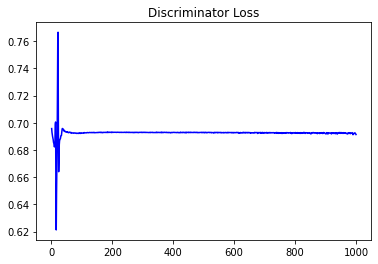

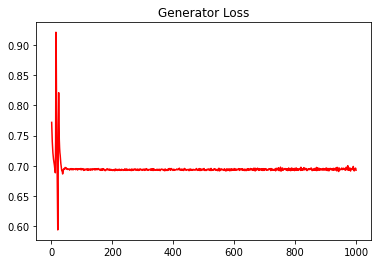

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10967464000442226


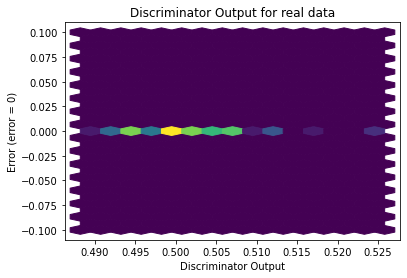

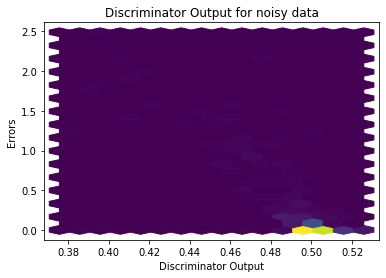

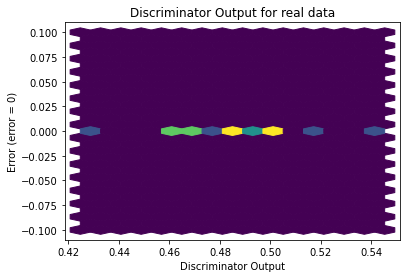

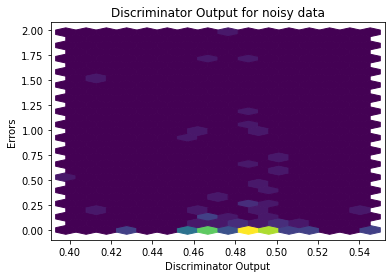

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


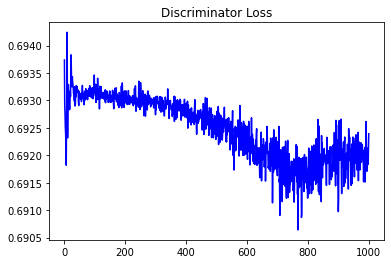

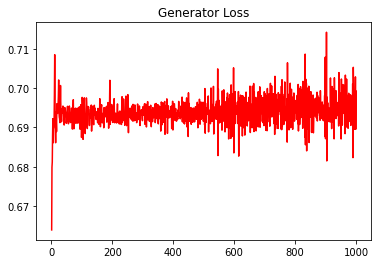

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10441903804698814


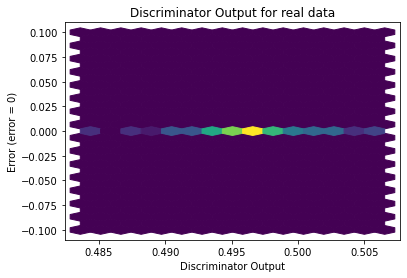

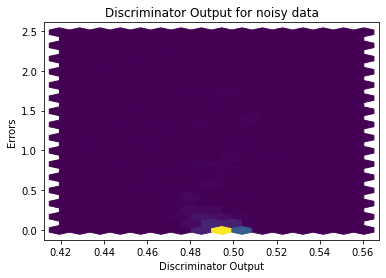

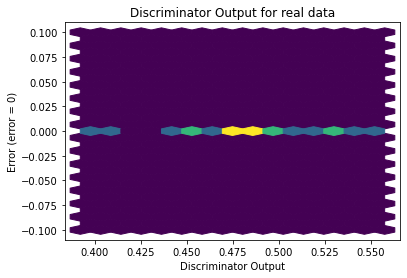

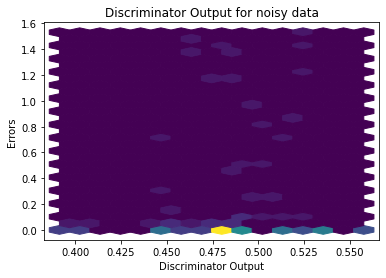

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1306]], requires_grad=True)
